In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
from scipy.stats import linregress

In [2]:
df = pd.read_csv("../_data/2020-report/scores_with_msas.csv")

### Question 1: Correlation between DBNA Score and Relative Business Activity

The R-Value between DBNA Scores and Relative Business Activity is 0.30956432359384595.


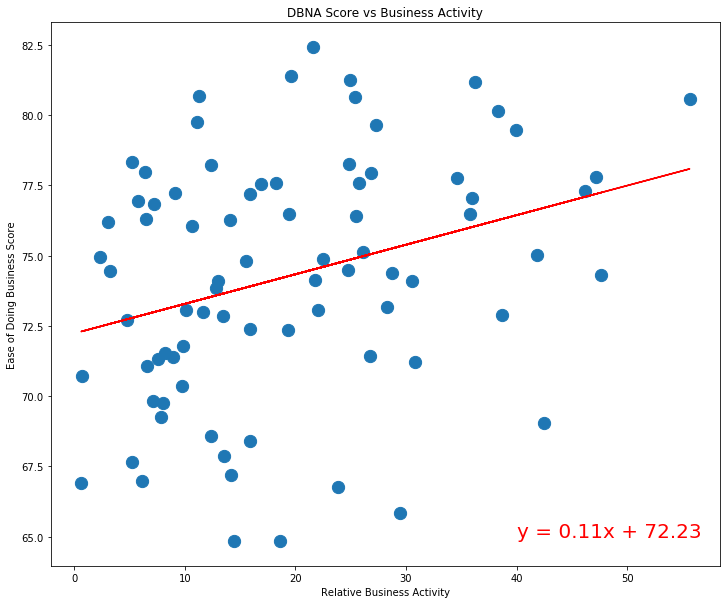

In [3]:
x_values = df['Activity']
y_values = df['Score']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

slope, intercept, r_value, p_value, std_err = sp.linregress(x_values, y_values)
print(f"The R-Value between DBNA Scores and Relative Business Activity is {r_value}.")

plt.figure(figsize=(12,10))
plt.scatter(x_values,y_values, s=150)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,65),fontsize=20,color="red")
plt.xlabel('Relative Business Activity')
plt.ylabel('Ease of Doing Business Score')
plt.title("DBNA Score vs Business Activity")
plt.show()

### Question 2: Clustering Correlation

In [4]:
X = df['Activity'].to_numpy()
_ = df['Score'].to_numpy()
data = np.vstack((X,_)).T

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=14)
kmeans.fit(data)
predicted_clusters = kmeans.predict(data)

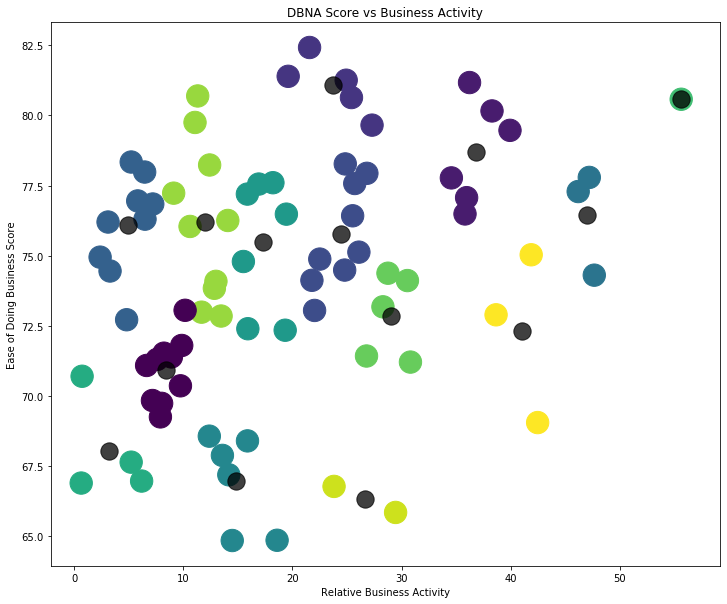

In [6]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_

plt.figure(figsize=(12,10))
plt.scatter(X,_, c=predicted_clusters, s=500)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.75)
plt.xlabel('Relative Business Activity')
plt.ylabel('Ease of Doing Business Score')
plt.title("DBNA Score vs Business Activity")
plt.show()
plt.show()

In [7]:
df = pd.read_csv("../_data/2020-report/cluster_vs_rank.csv")

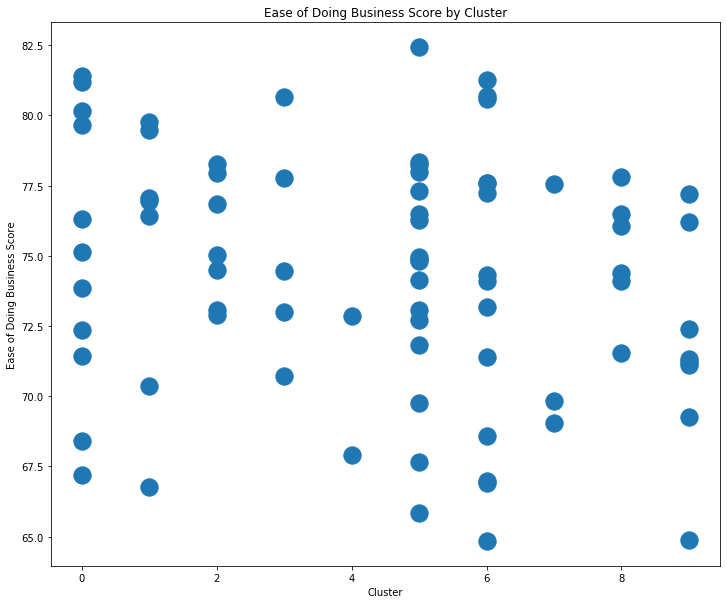

In [8]:
plt.figure(figsize=(12,10))
plt.scatter(df['Cluster'],df['Score'], s=300)
plt.xlabel('Cluster')
plt.ylabel('Ease of Doing Business Score')
plt.title("Ease of Doing Business Score by Cluster")
plt.show()